# MTA Traffic Forecasting
Khyatee Desai & Justin Morgan
# Part 4: Modeling Process
This notebook includes feature engineering and modeling

### Import Libraries

In [78]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

### Import Cleaned Data

In [71]:
df = pd.read_pickle("./pickled/cleaned_data")
df

STATION,1 AV,103 ST,103 ST-CORONA,104 ST,110 ST,111 ST,116 ST,116 ST-COLUMBIA,121 ST,125 ST,...,WHITLOCK AV,WILSON AV,WINTHROP ST,WOODHAVEN BLVD,WOODLAWN,WORLD TRADE CTR,WTC-CORTLANDT,YORK ST,ZEREGA AV,TOTAL
DATE,,,,,,,,,,,,,,,,,,,,,
2021-01-02,3559.0,4694.0,6158.0,979.0,2115.0,4661.0,5677.0,693.0,550.0,13679.0,...,466.0,973.0,1074.0,5682.0,1816.0,161.0,1594.0,1.0,472.0,864360.0
2021-01-03,2415.0,3278.0,4571.0,647.0,1522.0,3387.0,3994.0,455.0,401.0,9582.0,...,337.0,724.0,842.0,3784.0,1130.0,59.0,648.0,2.0,354.0,578814.5
2021-01-04,5193.0,7801.0,9253.0,1800.0,3378.0,7114.0,8669.0,1921.0,903.0,21790.0,...,788.0,1429.0,2552.0,6347.5,2780.0,2309.0,1546.0,2129.0,918.0,1426146.0
2021-01-05,5333.0,8251.0,9794.0,1795.0,3630.0,7692.0,9119.0,1936.0,946.0,22314.0,...,819.0,1513.0,2677.0,8911.0,2926.0,2395.0,1492.0,2153.0,956.0,1472308.5
2021-01-06,5468.0,8467.0,9972.0,1832.0,3850.0,7622.0,9131.0,2021.0,938.0,21924.0,...,841.0,1528.0,2609.0,9127.0,2840.0,2403.0,1560.0,2202.0,932.0,1482079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-08,5833.0,9097.0,9427.0,1952.0,3802.0,7169.0,10187.0,2131.0,1058.0,23662.0,...,818.0,1463.0,2887.0,8693.0,2841.0,2381.0,1641.0,2176.0,918.0,1525163.0
2021-03-09,6154.0,9570.0,9947.0,1943.0,4267.0,7642.0,10444.0,2172.0,998.0,25143.0,...,884.0,1650.0,2994.0,9338.0,3077.0,2565.0,1759.0,2418.0,979.0,1616116.0
2021-03-10,6021.0,9773.0,9926.0,1952.0,4190.0,7648.0,10768.0,2296.0,1111.0,24893.0,...,907.0,1570.0,2930.0,9329.0,3083.0,2493.0,1628.0,2374.0,976.0,1622137.0


### Define Dickey-Fuller Test Function

In [82]:
def dickey_fuller(series):
    dftest = adfuller(series)

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dftest)

    print ('\nResults of Dickey-Fuller test: \n')

    print(dfoutput)

# Remove Trends
Compare and contrast the different methods for removing trends and seasonality in time series data including differencing, rolling means, and log transformations to reduce non-stationarity



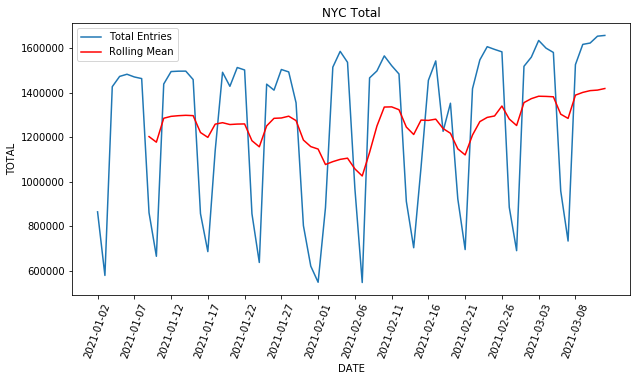

In [9]:
roll_mean = df["TOTAL"].rolling(window=8, center=False).mean()

plt.figure(figsize=(10,5));
ax = sns.lineplot( data=df["TOTAL"], label="Total Entries");
plt.plot(roll_mean, color='red', label='Rolling Mean')
ax.set(xticks=[x for x in df.index.values if df.index.get_loc(x)%5==0]);
plt.xticks(rotation=70);
plt.legend(loc='best');
plt.title('NYC Total');

Current data contains both Trends and Seasonality
<br>
**Trend:** Varying mean over time
<br>
**Seasonality:** Certain variations at specific time-frames
## Log Transformation
One way to enforce stationarity can be a simple log transformation to make the time series more "uniform" over time. For example, in the plot below, we can clearly see that there is a significant positive trend, which might not be linear, or when there is a certain level of heteroscedasticity.

The advantage of taking a log transformation is that higher values are penalized more than lower values. Alternatives for the log transformation are the square root, cube root transformations, etc.

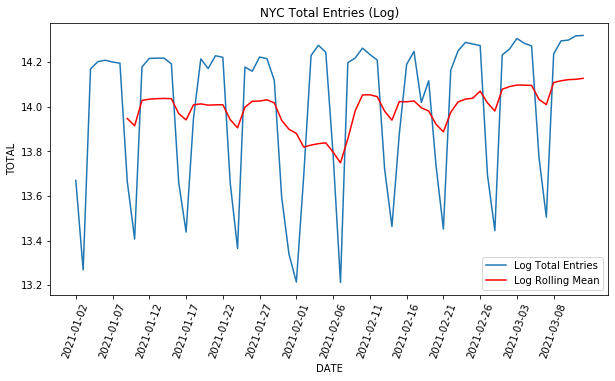

In [67]:
log_roll_mean = np.log(df["TOTAL"]).rolling(window=8, center=False).mean()
log_data = np.log(df["TOTAL"])

plt.figure(figsize=(10,5));
ax = sns.lineplot( data= log_data, label="Log Total Entries");
plt.plot(log_roll_mean, color='red', label='Log Rolling Mean')
ax.set(xticks=[x for x in df.index.values if df.index.get_loc(x)%5==0]);
plt.xticks(rotation=70);
plt.legend(loc='best');
plt.title('NYC Total Entries (Log)');

In [68]:
# Drop the missing values from time series calculated above
log_data.dropna(inplace=True)

### Check Stationarity with Dickey Fuller Test

In [83]:
dickey_fuller(log_data)


(-1.379913531712377, 0.5918670473893292, 6, 63, {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}, -8.374281426629906)

Results of Dickey-Fuller test: 

Test Statistic                 -1.379914
p-value                         0.591867
#Lags Used                      6.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


## Subtract Rolling Mean

In [58]:
# Subtract the moving average from the original data
roll_mean = df["TOTAL"].rolling(window=8, center=False).mean()
data_minus_roll_mean = df["TOTAL"] - roll_mean
data_minus_roll_mean.head(15)

DATE
2021-01-02              NaN
2021-01-03              NaN
2021-01-04              NaN
2021-01-05              NaN
2021-01-06              NaN
2021-01-07              NaN
2021-01-08              NaN
2021-01-09   -341799.625000
2021-01-10   -512316.312500
2021-01-11    153698.062500
2021-01-12    201068.895833
2021-01-13    199838.937500
2021-01-14    198320.104167
2021-01-15    162006.312500
2021-01-16   -364358.875000
Name: TOTAL, dtype: float64

In [59]:
# Drop the missing values from time series calculated above
data_minus_roll_mean.dropna(inplace=True)

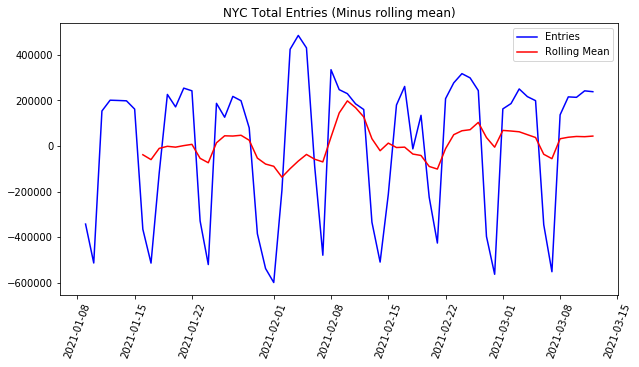

In [60]:
roll_mean = data_minus_roll_mean.rolling(window=8, center=False).mean()

plt.figure(figsize=(10,5));
plt.plot(data_minus_roll_mean, color='blue',label='Entries')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('NYC Total Entries (Minus rolling mean)')
ax.set(xticks=[x for x in df.index.values if df.index.get_loc(x)%7==0]);
plt.xticks(rotation=70);


### Check Stationarity with Dickey Fuller Test

In [84]:
dickey_fuller(data_minus_roll_mean)


(-4.179220465388473, 0.0007143465656967277, 11, 51, {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}, 1399.6558997533189)

Results of Dickey-Fuller test: 

Test Statistic                 -4.179220
p-value                         0.000714
#Lags Used                     11.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


## Differencing
One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of an observation at a particular time instant with that at the previous instant (i.e. a so-called 1-period "lag").

This mostly works pretty well in improving stationarity. First-order differencing can be done in Pandas using the .diff() method with periods=1 (denoting a 1-period lag). 

In [48]:
data_diff = df["TOTAL"].diff(periods=1)
data_diff.head(10)

DATE
2021-01-02         NaN
2021-01-03   -285545.5
2021-01-04    847331.5
2021-01-05     46162.5
2021-01-06      9770.5
2021-01-07    -12185.5
2021-01-08     -7306.0
2021-01-09   -602331.5
2021-01-10   -195462.5
2021-01-11    773442.0
Name: TOTAL, dtype: float64

In [49]:
# Drop the missing values from time series calculated above
data_diff.dropna(inplace=True)

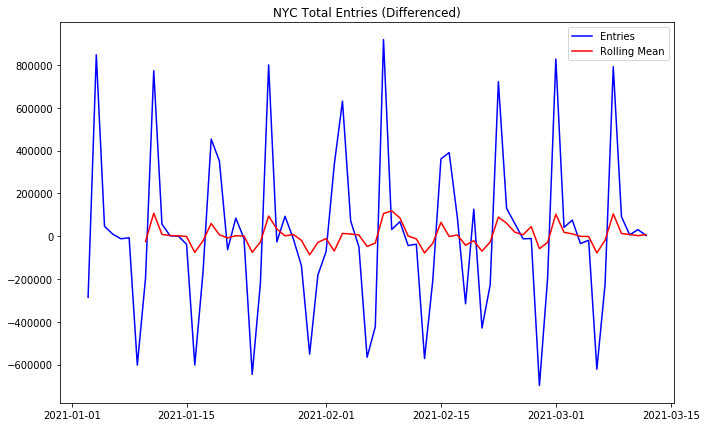

In [50]:
roll_mean = data_diff.rolling(window=8, center=False).mean()

fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Entries')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('NYC Total Entries (Differenced)')
plt.show(block=False)

### Confirm Stationarity with Dickey Fuller Test

In [85]:
dickey_fuller(data_diff)


(-12.046616332305591, 2.6558419556436907e-22, 5, 63, {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}, 1570.5236171563283)

Results of Dickey-Fuller test: 

Test Statistic                -1.204662e+01
p-value                        2.655842e-22
#Lags Used                     5.000000e+00
Number of Observations Used    6.300000e+01
Critical Value (1%)           -3.538695e+00
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
dtype: float64


## Differencing & Log Transformation

In [52]:
log_data = np.log(df["TOTAL"])
log_diff_data = log_data.diff(periods=1)

In [53]:
# Drop the missing values from time series calculated above
log_diff_data.dropna(inplace=True)

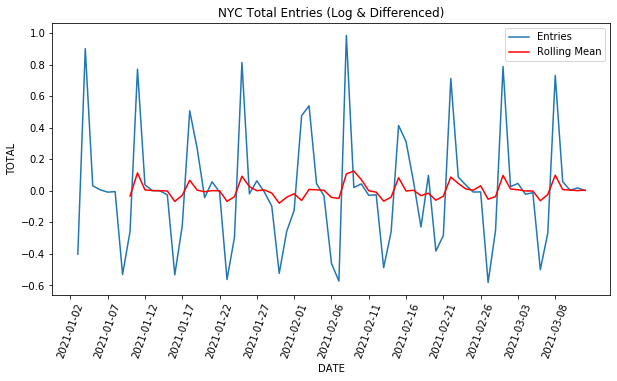

In [54]:
roll_mean = log_diff_data.rolling(window=8, center=False).mean()

plt.figure(figsize=(10,5));
ax = sns.lineplot( data= log_diff_data, label="Entries");
plt.plot(roll_mean, color='red', label='Rolling Mean')
ax.set(xticks=[x for x in df.index.values if df.index.get_loc(x)%5==0]);
plt.xticks(rotation=70);
plt.legend(loc='best');
plt.title('NYC Total Entries (Log & Differenced)');

### Confirm Stationarity with Dickey Fuller Test

In [86]:
dickey_fuller(log_diff_data)


(-12.434234398205964, 3.8791776900324863e-23, 5, 63, {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}, -6.930554341526914)

Results of Dickey-Fuller test: 

Test Statistic                -1.243423e+01
p-value                        3.879178e-23
#Lags Used                     5.000000e+00
Number of Observations Used    6.300000e+01
Critical Value (1%)           -3.538695e+00
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
dtype: float64


## Time Series Decomposition
Time series decomposition is a mathematical procedure that transforms a time series into multiple different time series. The original time series is often split into three component series:

**Seasonal:** Patterns that repeat within a fixed period. For example, a website might receive more visits during weekends; this would produce data with a seasonality of 7 days.
<br>
**Trend:** The underlying trend of the metrics. A website increasing in popularity should show a general trend that goes up.
<br>
**Random:** Also called "noise", "irregular", or "remainder", this is the residual of the original time series after the seasonal and trend series are removed.

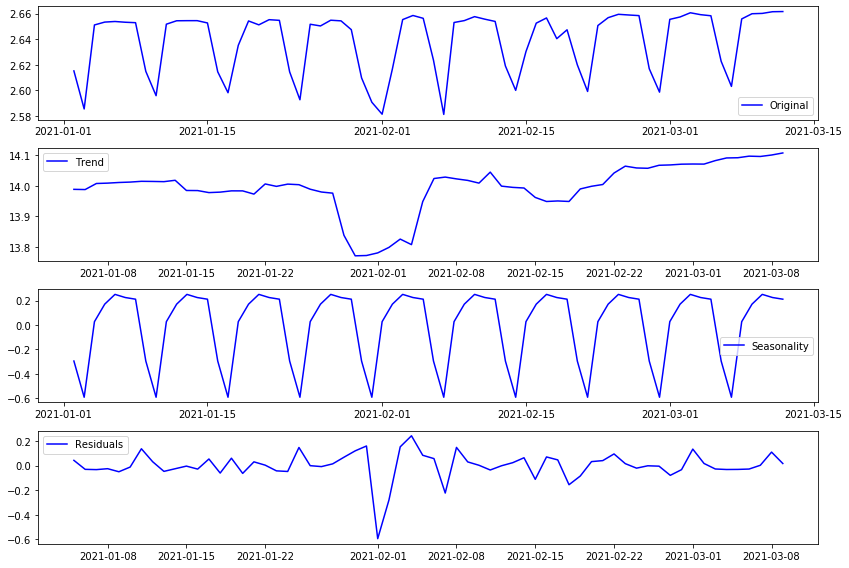

In [75]:
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(df['TOTAL']))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(np.log(df['TOTAL'])), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

### Check Stationarity of Residuals with Dickey Fuller

In [87]:
# Drop missing values from residuals 
df_log_decompose = residual
df_log_decompose.dropna(inplace=True)
dickey_fuller(df_log_decompose)


(-4.1859610502269975, 0.0006958973266518167, 8, 55, {'1%': -3.5552728880540942, '5%': -2.9157312396694217, '10%': -2.5956695041322315}, -85.85938187758936)

Results of Dickey-Fuller test: 

Test Statistic                 -4.185961
p-value                         0.000696
#Lags Used                      8.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64
